# Исследование объявлений о продаже квартир

В распоряжении архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. 

**Цели исследования:**
1. Проверить, как быстро продаются квартиры.
2. Какие факторы больше всего влияют на общую стоимость объекта?
3. Найти населённые пункты с высокой и низкой стоимостью квадратного метра.
4. Изучить, как стоимость объектов зависит от расстояния до центра города.

**Ход исследования**

Получим данные из файла `real_estate_data.csv`. Изучим общую информацию. На следующем этапе нужно проверить данные на пропуски, аномалии и дубликаты. После этого добавлим в таблицу дополнительных столбцов для исследования. На последнем этапе изучим вопросы исследования. 

Таким образом, исследование пройдёт в четыре этапа:
1. Обзора данных.
2. Предобработка данных.
3. Добавление дополнительной информации для исследования.
4. Исследовательский анализ данных.

## Изучение общей информации 

Импортируем библиотеку `pandas` и `matplotlib`. Считаем данные из csv-файла в датафрейм и сохраним в переменную `data`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

Выведим первые 20 строчек датафрейма `data` на экран.

In [2]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Выведим основную информацию о датафрейме с помощью метода `info()`.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Построим общую гистограмму для всех столбцов таблицы. 

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

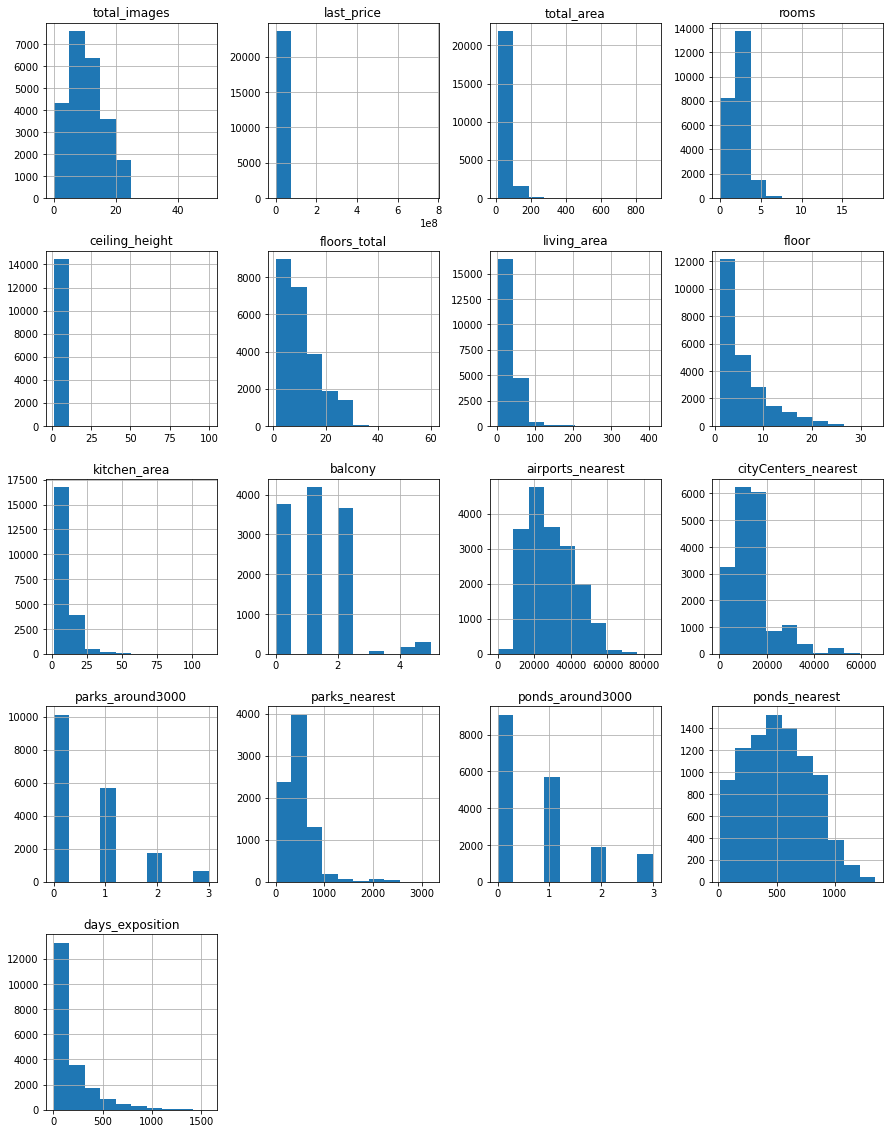

In [4]:
data.hist(figsize=(15, 20))

## Предобработка данных

### Обработка пропущенных значений

Выведим количество пропущенных значений для каждого столбца.

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропущенные значения высоты потолков и количество дней размещения объявления заменим на медиану. 

In [6]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median())

Пропущенные значения количества этажей тоже заменим на медиану, если медиана больше количества этажей, заменим эти значния на этаж самой квартиры.   

In [7]:
floors_total_median = data['floors_total'].median()
data['floors_total'] = data['floors_total'].fillna(floors_total_median)
data.loc[(data['floors_total'] > floors_total_median), 'floors_total'] = data['floor']

Заменим пропущенные значения в столбце `is_apartment` на `False`

In [8]:
data['is_apartment'] = data['is_apartment'].fillna(False)

В столбцах `balcony`, `parks_around3000` и `ponds_around3000` заменим пропуски на 0. Так как, скорее всего, пропуски говорят об отсутствии.  

In [9]:
data['balcony'] = data['balcony'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

Удалим пропущенные значения в столбце `locality_name`, так как их немного.

In [10]:
data = data.dropna(subset=['locality_name'])
data = data.reset_index(drop=True)

In [11]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1898
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000            0
parks_nearest           15586
ponds_around3000            0
ponds_nearest           14565
days_exposition             0
dtype: int64

Заменять пропуски в остальных столбцах не будем, так как логичную замену предложить нельзя.

### Изменение типов данных

Переведём значение количества в тип данных `int`.

In [12]:
data['balcony'] = data['balcony'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
data['days_exposition'] = data['days_exposition'].astype('int')

Переведём столбец `is_apartment` в булев тип.

In [13]:
data['is_apartment'] = data['is_apartment'].astype('bool')

Переведём столбец `first_day_exposition` в тип данных `datetime`

In [14]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

В столбеце `last_price` изменим тип данных на `int`

In [15]:
data['last_price'] = data['last_price'].astype('int')

### Устранение дубликатов

Найдём количество явных дубикатов.

In [16]:
data.duplicated().sum()

0

Явных дубликатов не оказалось. Посмотрим на уникальные значения в столбце `locality_name`

In [17]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Заменим букву `ё` на `е`. Также `городской посёлок` на `посёлок городского типа`

In [18]:
def replace_name(name):
    if 'городской поселок' in str(name):
        return name.replace('городской поселок', 'поселок городского типа')
    else:
        return str(name)
    
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=True)
data['locality_name'] = data['locality_name'].apply(replace_name)

### Устранение аномалий

С помощью метода `describe` найдём аномальные значения в каждом столбце.

In [19]:
for col in data.columns:
    print(col)
    print(data[col].describe())
    print()

total_images
count    23650.000000
mean         9.862326
std          5.682278
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

last_price
count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

total_area
count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

first_day_exposition
count                   23650
unique                   1491
top       2018-02-01 00:00:00
freq                      368
first     2014-11-27 00:00:00
last      2019-05-03 00:00:00
Name: first_day_exposition, dtype: object

rooms
count    23650.000000
mean         2.070106
std          1.078620
min          0.00

/tmp/ipykernel_90/1162356332.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(data[col].describe())


В столбце `rooms` встречаются значения 0. Посмотрим на среднюю площадь таких квартир.

In [20]:
data[data['rooms'] == 0]['total_area'].mean()

29.279746192893406

Средняя площать почти 30 квадратных метром. Следовательно количество комант можно изменить на значение 1.

In [21]:
data.loc[data['rooms'] == 0, 'rooms'] = 1

<AxesSubplot:>

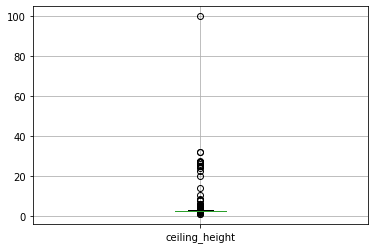

In [22]:
data.boxplot('ceiling_height')

В столбце `ceiling_height` встречатся высота потолков больше 20 м. Скорее всего, это вещественные значения: 2.0.

<AxesSubplot:>

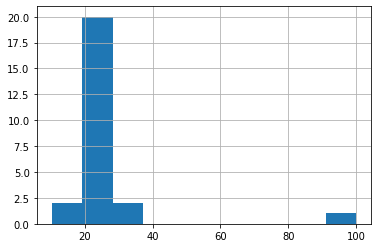

In [23]:
data.query('ceiling_height > 10')['ceiling_height'].hist()

Разделим значения больше 20 на 10. 

In [24]:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] /= 10

<AxesSubplot:>

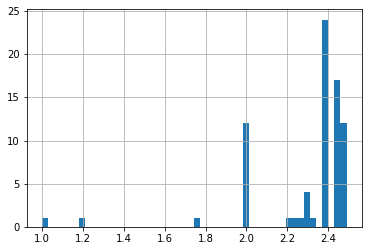

In [25]:
data.query('ceiling_height < 2.5')['ceiling_height'].hist(bins=50)

<AxesSubplot:>

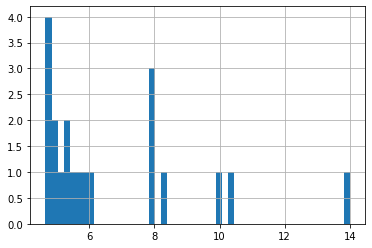

In [26]:
data.query('ceiling_height > 4.5')['ceiling_height'].hist(bins=50)

Удалим аномально высокие и аномально низкие высоты.

In [27]:
data = data[(data['ceiling_height'] >= 2.4) & (data['ceiling_height'] <= 7)]

**Вывод:** 

* Пропущенные значения в столбцах `balcony`, `ponds_around3000` и `parks_around3000` заменили на 0
* Удалили пропуски в столбце `locality_name`
* Перевели столбец `first_day_exposition` в тип данных `datetime`
* Устранили дубликаты в названиях населённых пунктов
* Устранили аномалии в столбцах `ceiling_height` и `rooms`

### Добавим в таблицу новые столбцы

Добавим в таблицу столбец с ценой за один квадратный метр.

In [28]:
data['price_square_meter'] = data['last_price'] / data['total_area']

Добавим столбцы с днём недели, месяце и годом публикации объявления.

In [29]:
data['publishing_day'] = data['first_day_exposition'].dt.weekday
data['publishing_month'] = data['first_day_exposition'].dt.month
data['publishing_year'] = data['first_day_exposition'].dt.year

Напишем функцию для определения типа этажа квартиры.

In [30]:
def apartment_floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

Добавим столбец с типом этажа квартиры.

In [31]:
data['floor_type'] = data.apply(apartment_floor_type, axis=1)

Добавим столбец с расстояние до центра города в километрах.

In [32]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000 # переводим в км 
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].round(decimals=0) # округляем до целых значений

## Исследовательский анализ данных

### Изучим некоторые параметры объектов 

С помощью метода `describe()` посмотрим на основные характеристики для параметров объектов. Построим гистограммы.

In [33]:
data['total_area'].describe()

count    23620.000000
mean        60.343779
std         35.677607
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

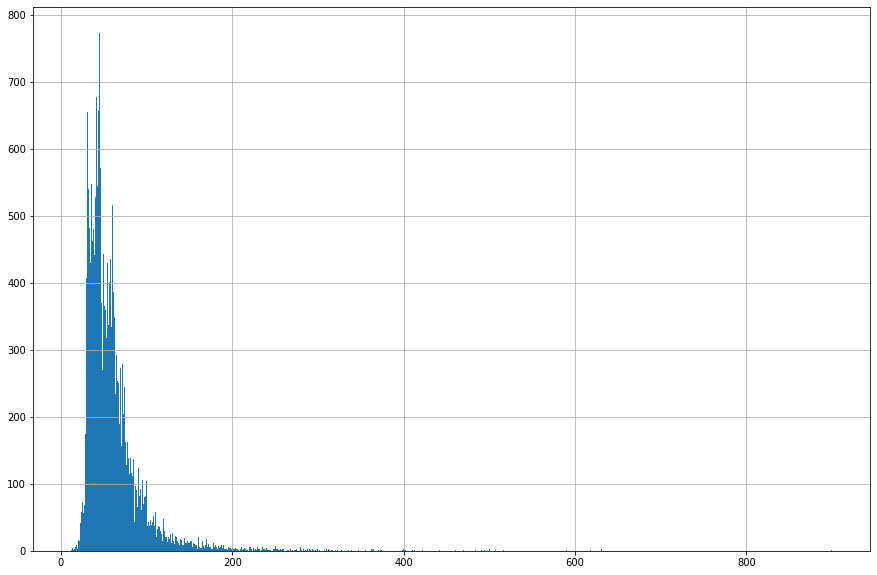

In [34]:
data['total_area'].hist(bins=900, figsize=(15, 10))

Расмотрим пиковые значения.

<AxesSubplot:>

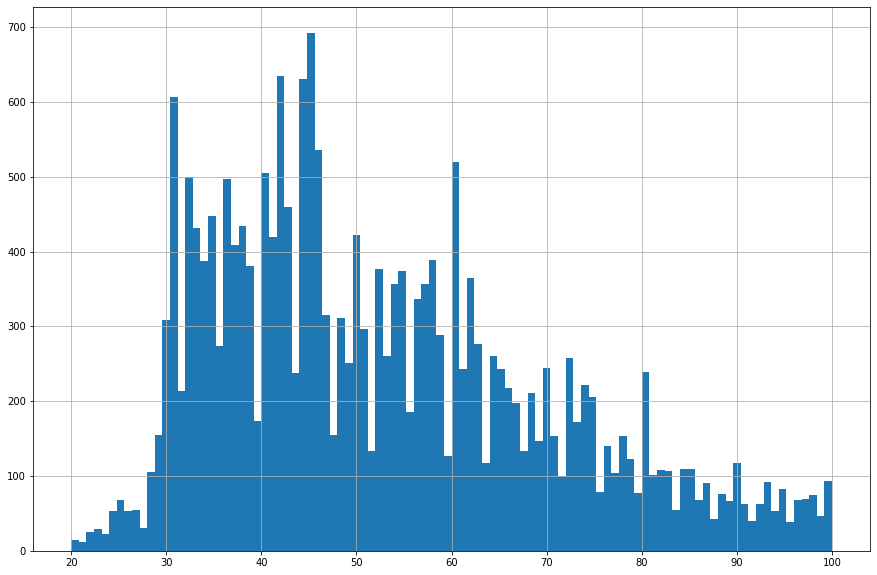

In [35]:
data['total_area'].hist(bins=100, figsize=(15, 10), range=(20, 100))

In [36]:
data['living_area'].describe()

count    21725.000000
mean        34.454680
std         22.045599
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

<AxesSubplot:>

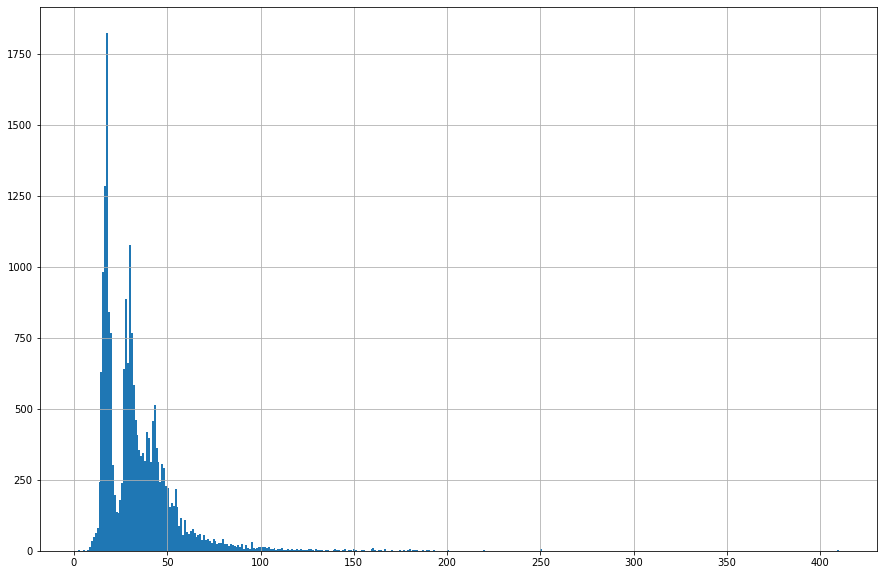

In [37]:
data['living_area'].hist(bins=400, figsize=(15, 10))

In [38]:
data['kitchen_area'].describe()

count    21356.000000
mean        10.569209
std          5.903983
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

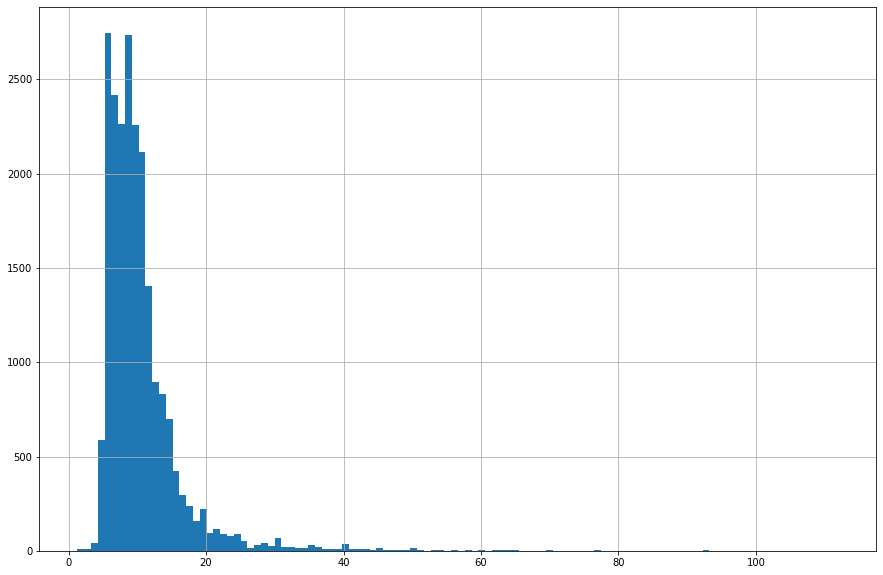

In [39]:
data['kitchen_area'].hist(bins=112, figsize=(15, 10))

In [40]:
data['last_price_mln'] = data['last_price'] / 1000000
data['last_price_mln'].describe()

count    23620.000000
mean         6.544320
std         10.902398
min          0.012190
25%          3.407500
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price_mln, dtype: float64

<AxesSubplot:>

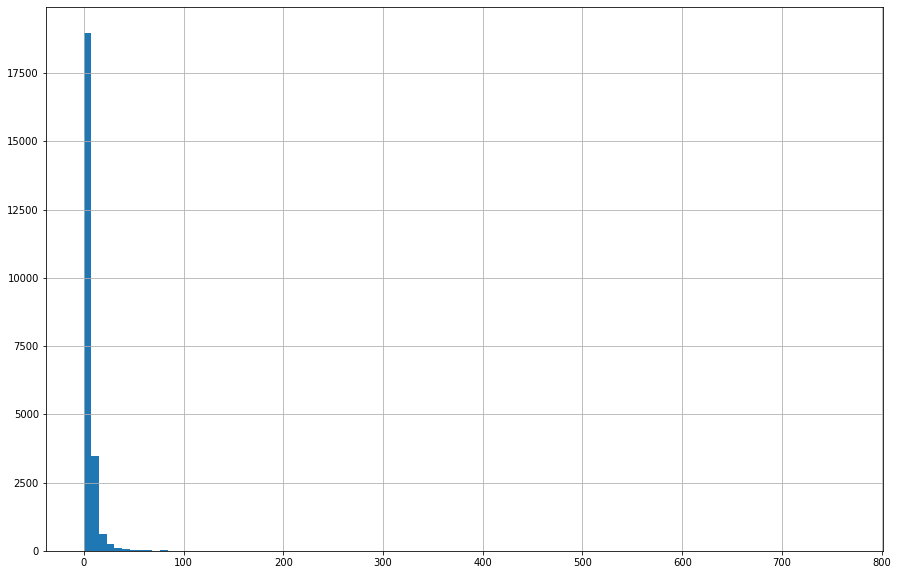

In [41]:
data['last_price_mln'].describe()
data['last_price_mln'].hist(bins=100, figsize=(15, 10))

In [42]:
data['rooms'].describe()

count    23620.000000
mean         2.078704
std          1.066657
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<AxesSubplot:>

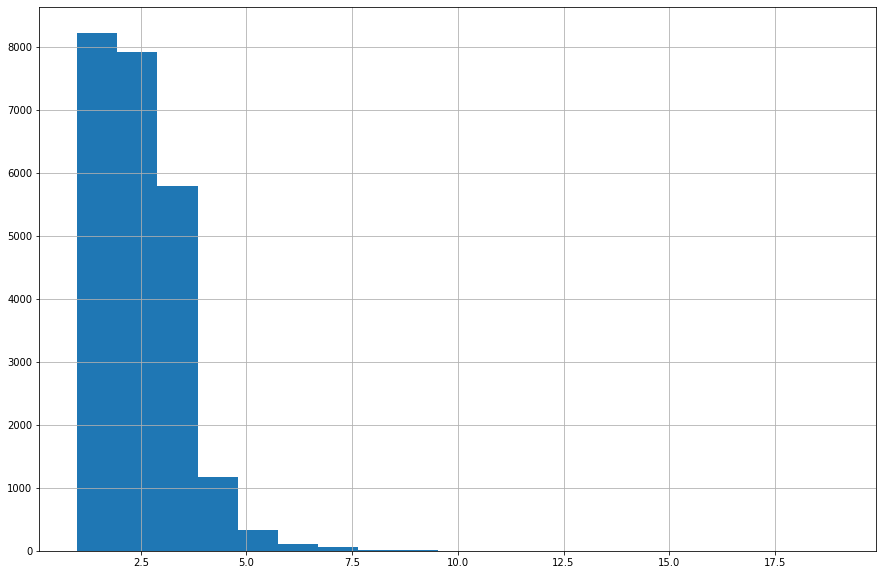

In [43]:
data['rooms'].hist(bins=19, figsize=(15, 10))

In [44]:
data['ceiling_height'].describe()

count    23620.000000
mean         2.697272
std          0.220496
min          2.400000
25%          2.600000
50%          2.650000
75%          2.700000
max          6.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

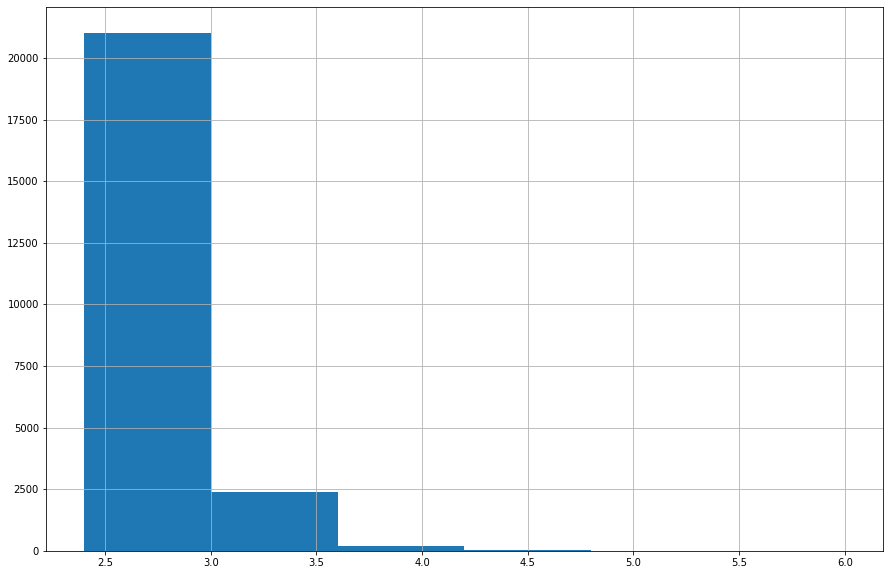

In [45]:
data['ceiling_height'].hist(bins=6, figsize=(15, 10))

In [46]:
data['floor'].describe()

count    23620.000000
mean         5.893903
std          4.883962
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

<AxesSubplot:>

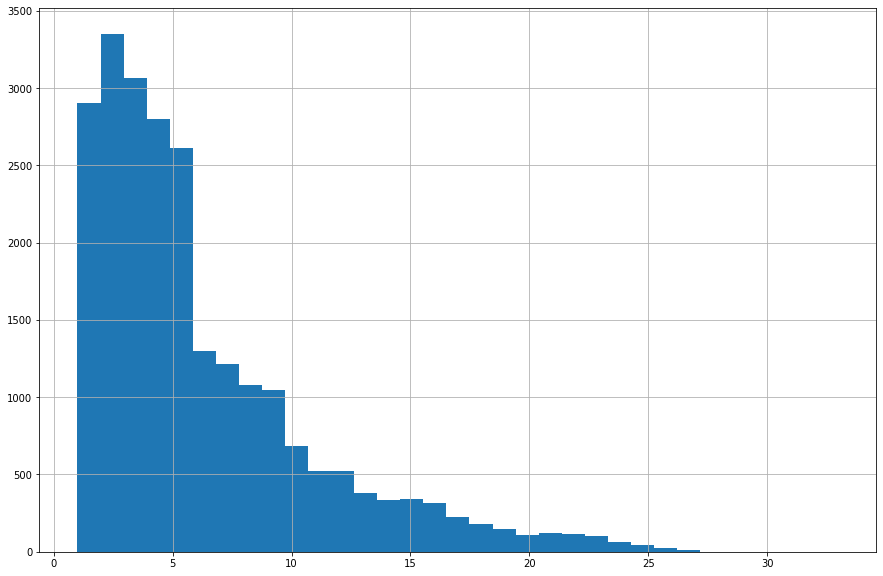

In [47]:
data['floor'].hist(bins=33, figsize=(15, 10))

In [48]:
data['floors_total'].describe()

count    23620.000000
mean         7.342591
std          4.293055
min          1.000000
25%          5.000000
50%          6.000000
75%          9.000000
max         33.000000
Name: floors_total, dtype: float64

<AxesSubplot:>

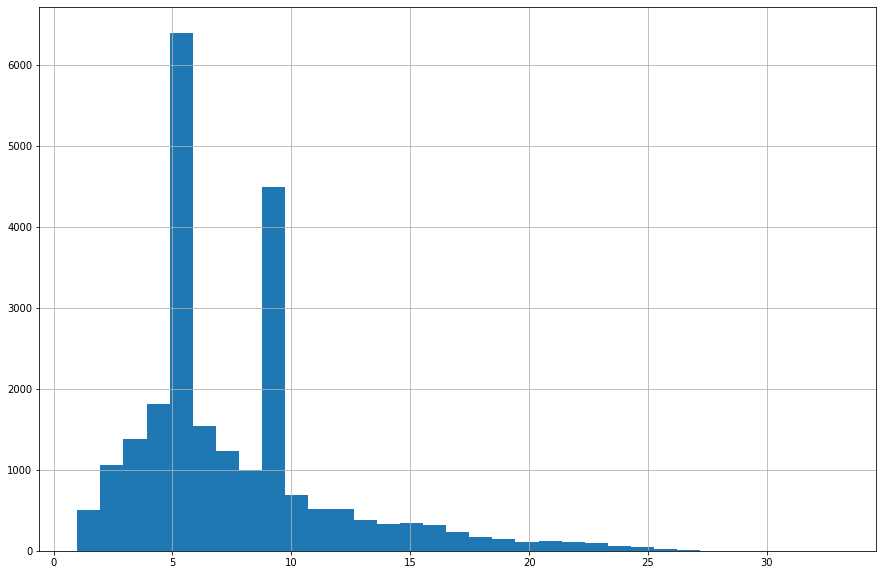

In [49]:
data['floors_total'].hist(bins=33, figsize=(15, 10))

In [50]:
data['cityCenters_nearest'].describe()

count    18125.000000
mean     14197.385159
std       8608.521274
min        181.000000
25%       9241.000000
50%      13105.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

<AxesSubplot:>

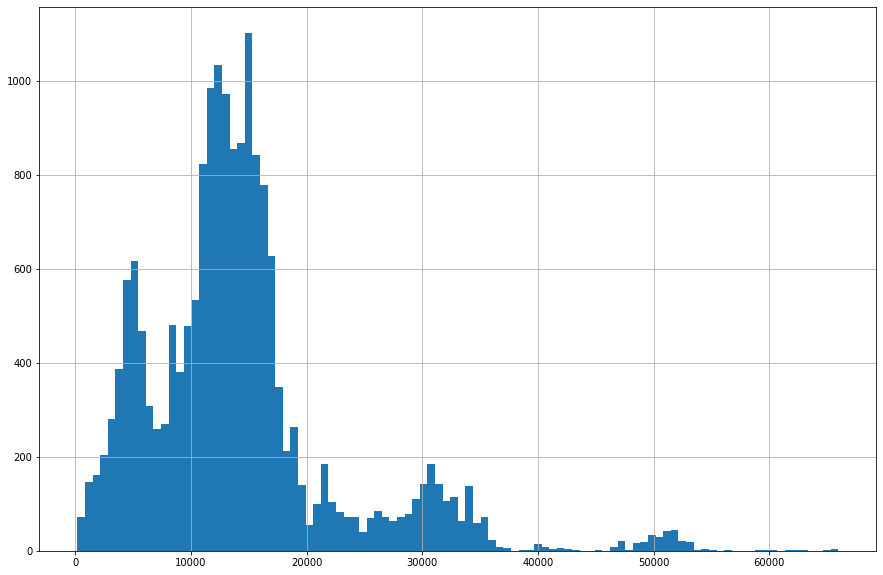

In [51]:
data['cityCenters_nearest'].hist(bins=100, figsize=(15, 10))

In [52]:
data['airports_nearest'].describe() 

count    18102.000000
mean     28803.491161
std      12639.150928
min          0.000000
25%      18575.250000
50%      26755.500000
75%      37306.000000
max      84869.000000
Name: airports_nearest, dtype: float64

<AxesSubplot:>

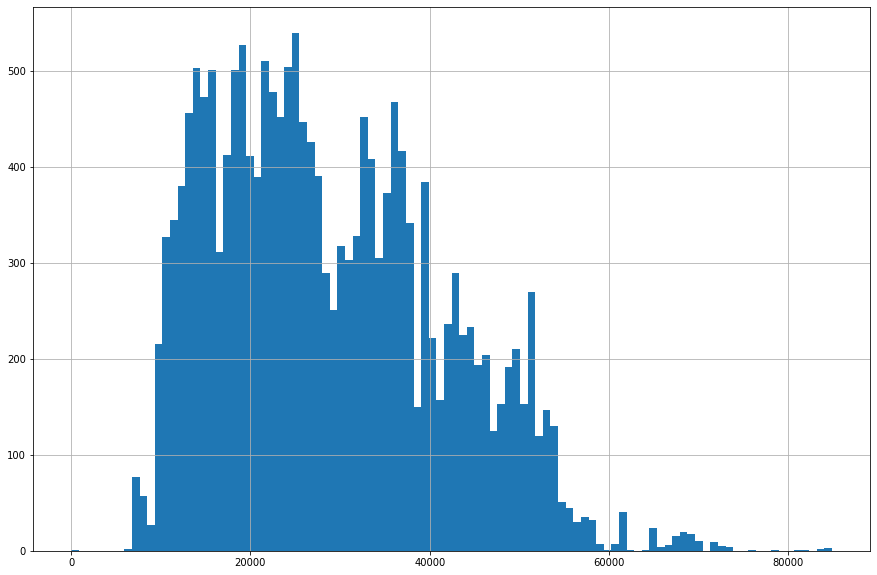

In [53]:
data['airports_nearest'].hist(bins=100, figsize=(15, 10))

In [54]:
data['parks_nearest'].describe() 

count    8056.000000
mean      490.793942
std       342.651831
min         1.000000
25%       287.750000
50%       454.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

<AxesSubplot:>

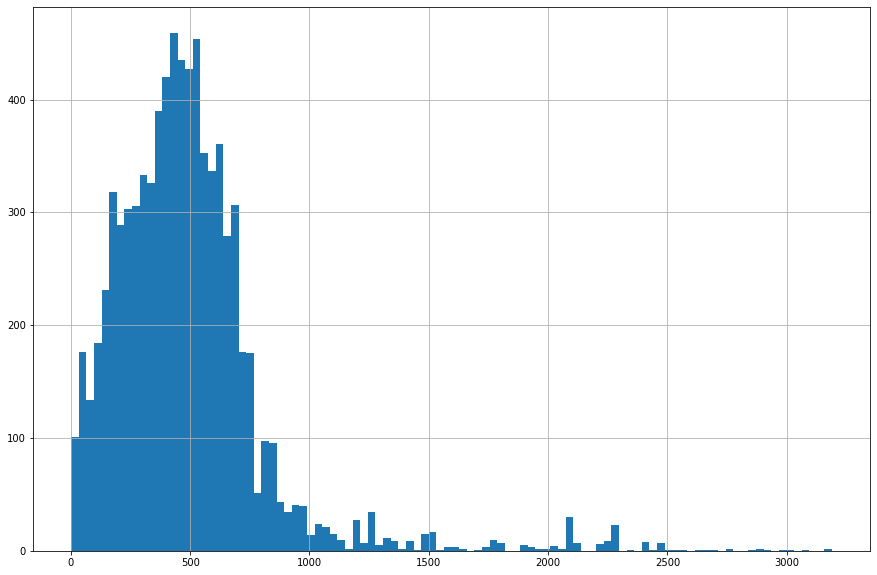

In [55]:
data['parks_nearest'].hist(bins=100, figsize=(15, 10))

In [56]:
data['publishing_day'].describe()

count    23620.000000
mean         2.568798
std          1.788788
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: publishing_day, dtype: float64

<AxesSubplot:>

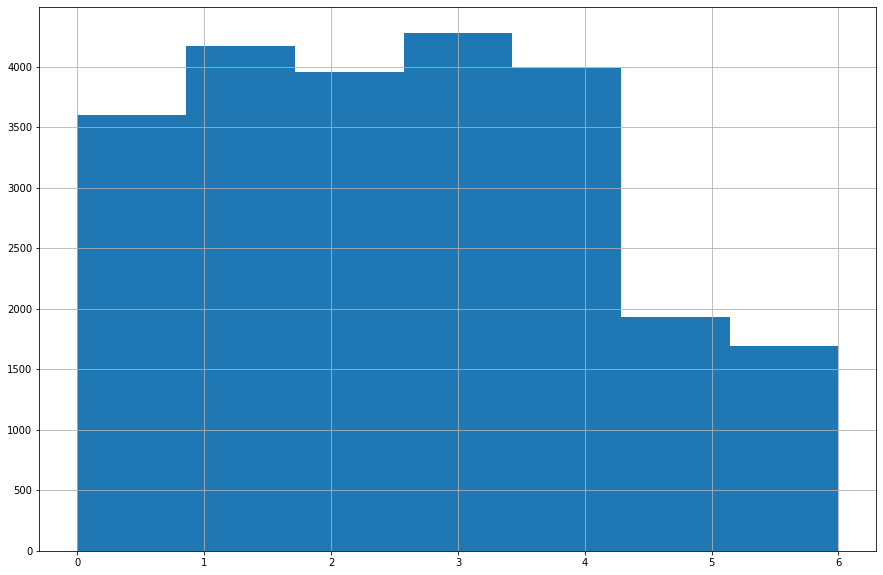

In [57]:
data['publishing_day'].hist(bins=7, figsize=(15, 10))

In [58]:
data['publishing_month'].describe()

count    23620.000000
mean         6.401397
std          3.491514
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: publishing_month, dtype: float64

<AxesSubplot:>

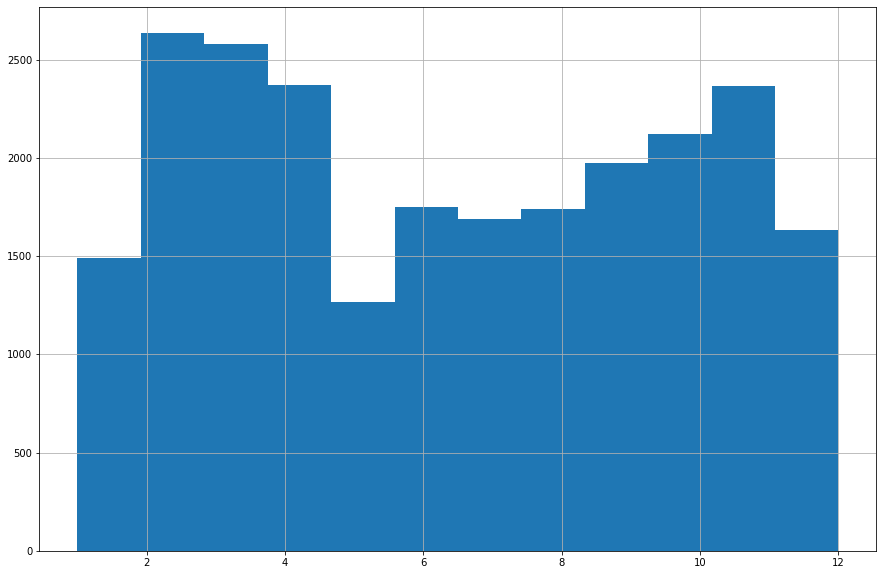

In [59]:
data['publishing_month'].hist(bins=12, figsize=(15, 10))

<AxesSubplot:>

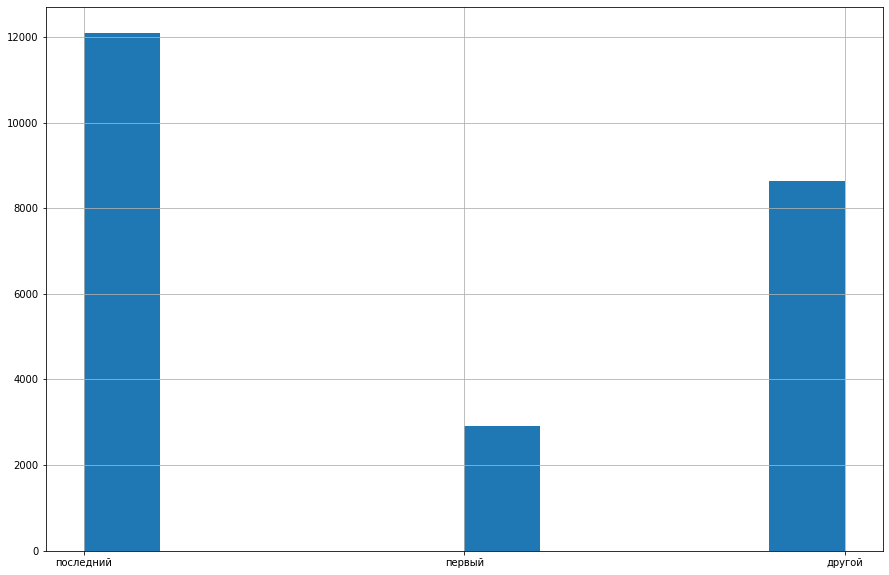

In [60]:
data['floor_type'].hist(figsize=(15, 10))

**Вывод:** По гистограммам и описанию характеристик можно увидеть , что
* общая площадь в основном 60 квадратных метра. 
* жилая площадь и площадь кухни в среднем 34 и 11 квадратных метров соответственно.
* максимальная цена квартиры 763 миллиона
* в среднем в квартирах по 2 команаты
* средняя высота потолков 2.7 метра
* на выходных реже публикуют объявления
* квартир на первом этаже в объявленях меньше всего, чем на последнем и на других этажах

###  Изучим, как быстро продавались квартиры.

Построим гистограмму по столбцу `days_exposition`.

<AxesSubplot:>

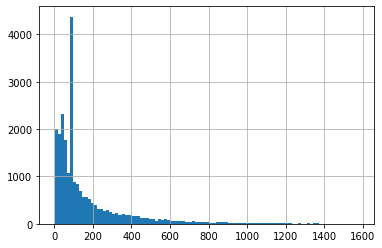

In [61]:
data['days_exposition'].hist(bins=100)

<AxesSubplot:>

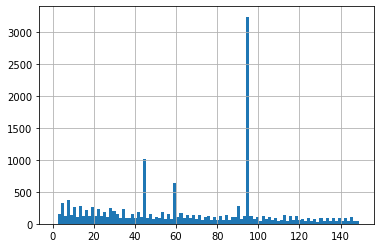

In [62]:
data.query('days_exposition < 150')['days_exposition'].hist(bins=100)

Посчитаем медиану и среднее.

In [63]:
data['days_exposition'].median()

95.0

In [64]:
data['days_exposition'].mean()

169.2621083827265

Посмотрим на быстрые и долгие продажи.

<AxesSubplot:>

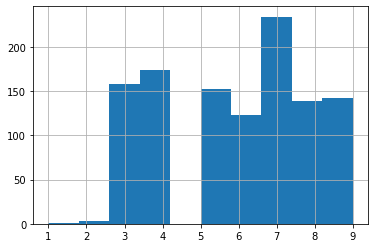

In [65]:
data.query('days_exposition < 10')['days_exposition'].hist()

<AxesSubplot:>

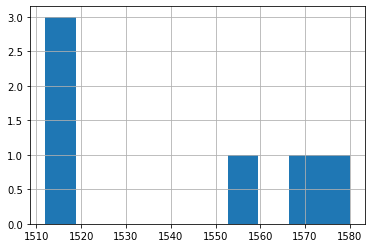

In [66]:
data.query('days_exposition > 1500')['days_exposition'].hist()

**Вывод:** Обычно продажи занимают около 100 дней. Быстрыми продажами можно считать те, которые были совершены до 5 дней. Наиболее долгой является продажа от 4 лет. 

### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

Построим графики для каждого параметра, которые показывают зависимость от стоимости. Затем, чтобы узнать, как разные параметры влияют на цену, построим диаграмму рассеяния и посчитаем корреляцию

**Зависимость от общей площади**

<AxesSubplot:xlabel='total_area'>

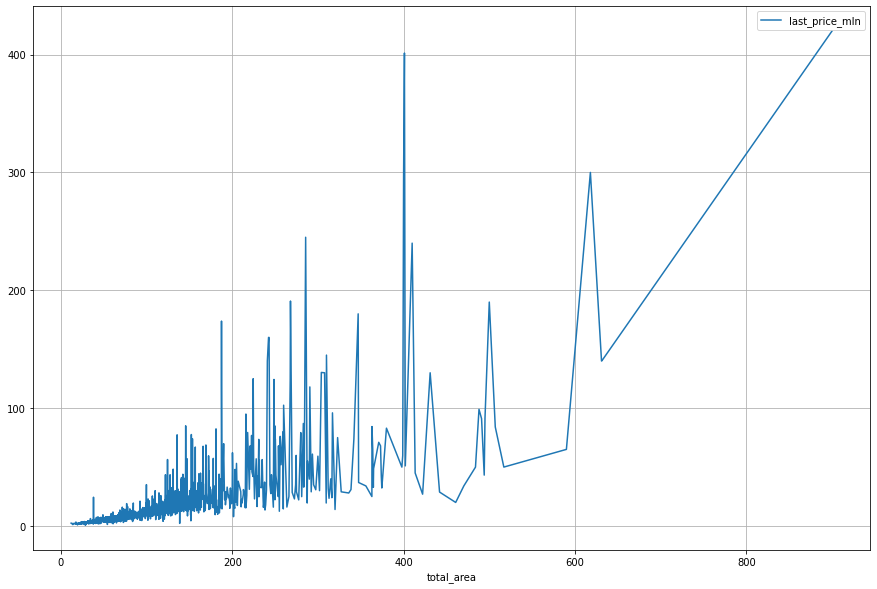

In [67]:
(
    data.pivot_table(index='total_area', values='last_price_mln', aggfunc='mean') 
    .plot(grid=True, figsize=(15, 10)) 
)

Корреляция: 0.6537797194763849


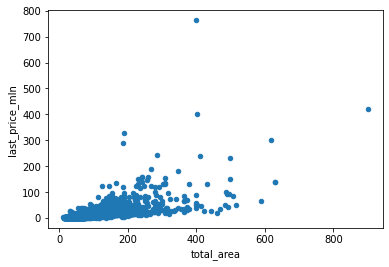

In [68]:
data.plot(x='total_area', y='last_price_mln', kind='scatter')
print('Корреляция:',data['total_area'].corr(data['last_price_mln']))

Есть зависимость от общей площади. Чем больше площадь, тем больше цена.

**Зависимость от жилой площади**

<AxesSubplot:xlabel='living_area'>

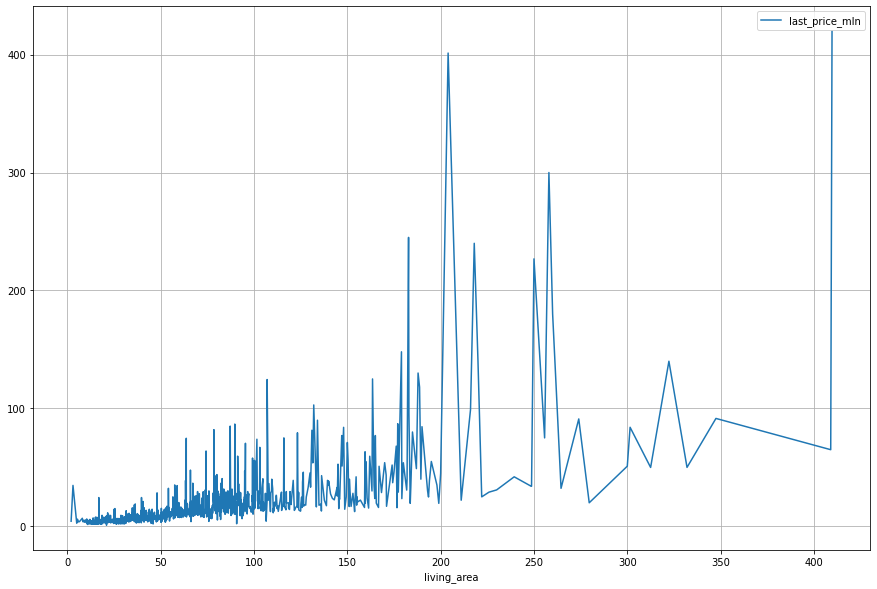

In [69]:
(
    data.pivot_table(index='living_area', values='last_price_mln', aggfunc='mean') 
    .plot(grid=True, figsize=(15, 10)) 
)

Корреляция: 0.5666055533219205


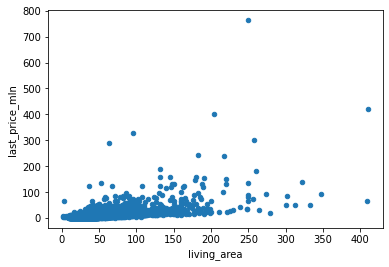

In [70]:
data.plot(x='living_area', y='last_price_mln', kind='scatter')
print('Корреляция:',data['living_area'].corr(data['last_price_mln']))

Есть небольшая зависимость от жилой площади. Чем больше площадь, тем больше цена.

**Зависимость от площади кухни**

<AxesSubplot:xlabel='kitchen_area'>

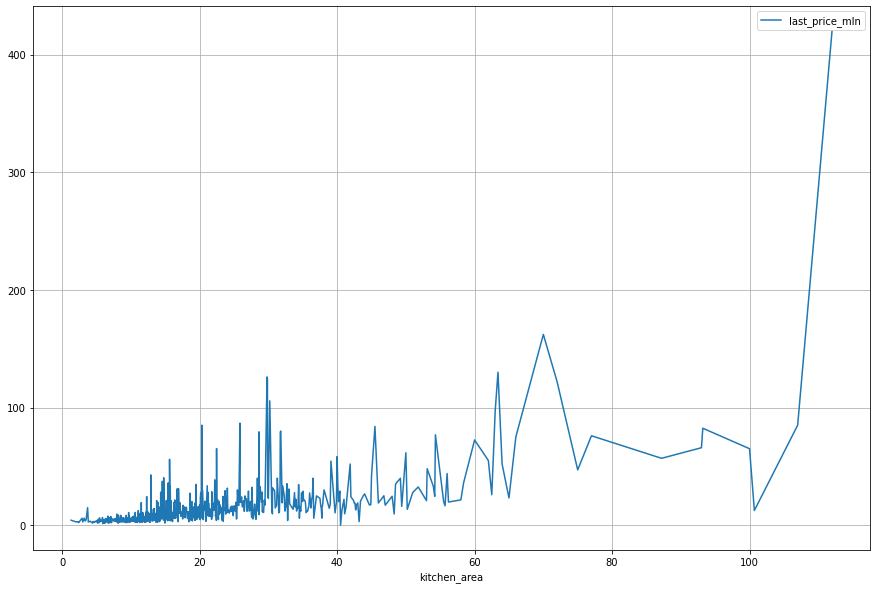

In [71]:
(
    data.pivot_table(index='kitchen_area', values='last_price_mln', aggfunc='mean') 
    .plot(grid=True, figsize=(15, 10)) 
)

Корреляция: 0.5201698028693699


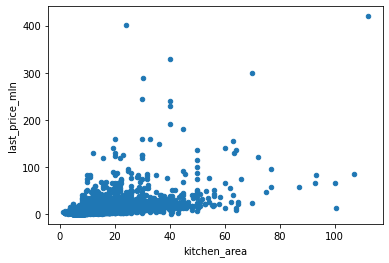

In [72]:
data.plot(x='kitchen_area', y='last_price_mln', kind='scatter')
print('Корреляция:',data['kitchen_area'].corr(data['last_price_mln']))

Есть небольшая зависимость от площади кухни. Чем больше площадь, тем больше цена.

**Зависимость от количества комнат**

<AxesSubplot:xlabel='rooms'>

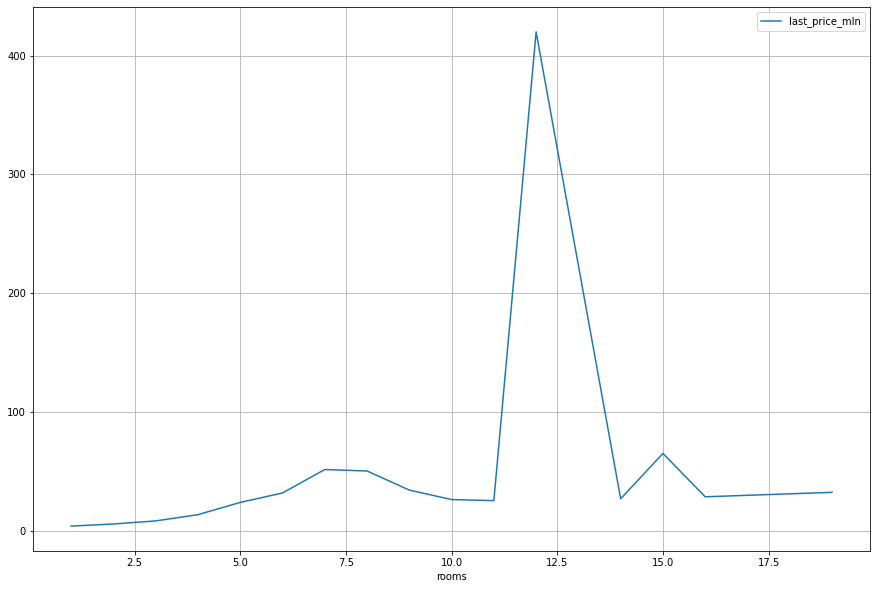

In [73]:
(
    data.pivot_table(index='rooms', values='last_price_mln', aggfunc='mean') 
    .plot(grid=True, figsize=(15, 10)) 
)

Корреляция: 0.36538845890618693


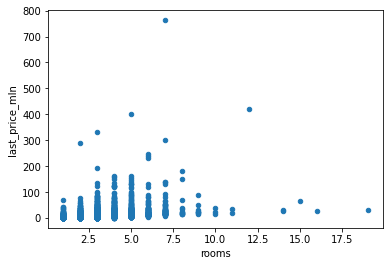

In [74]:
data.plot(x='rooms', y='last_price_mln', kind='scatter')
print('Корреляция:',data['rooms'].corr(data['last_price_mln']))

Есть незначительная зависимость от количества комнат. Чем больше количество комнат, тем больше цена.

**Зависимость от этажа, на котором расположена квартира (первый, последний, другой)**

<AxesSubplot:xlabel='floor_type'>

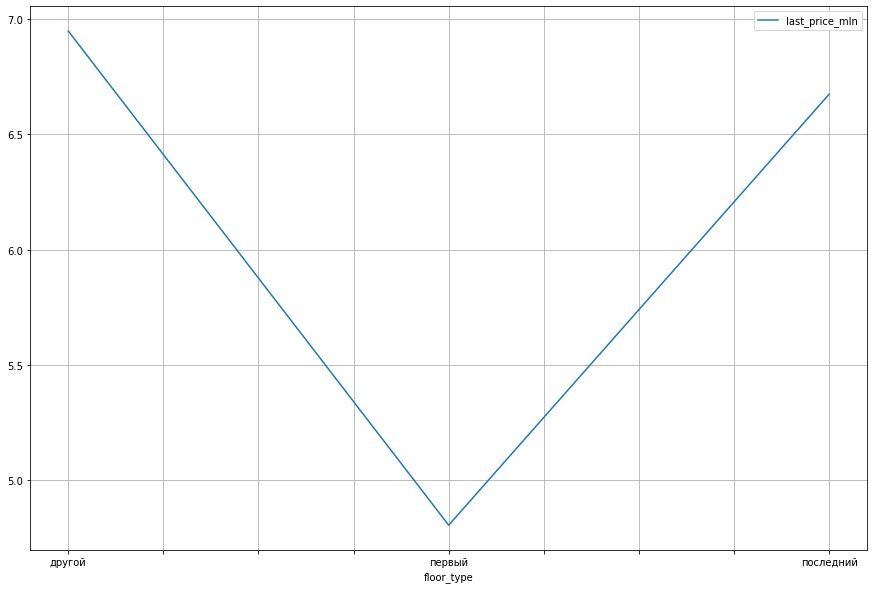

In [75]:
(
    data.pivot_table(index='floor_type', values='last_price_mln', aggfunc='mean') 
    .plot(grid=True, figsize=(15, 10)) 
)

<AxesSubplot:xlabel='floor_type', ylabel='last_price_mln'>

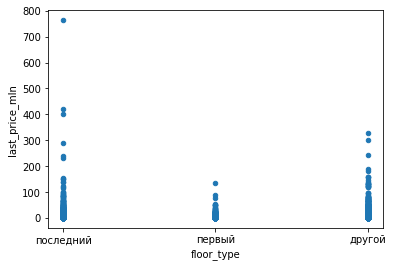

In [76]:
data.plot(x='floor_type', y='last_price_mln', kind='scatter')

Есть зависимость от типа этажа. На первом этаже стоимость меньше.

**Зависимость от дня недели размещения**

<AxesSubplot:xlabel='publishing_day'>

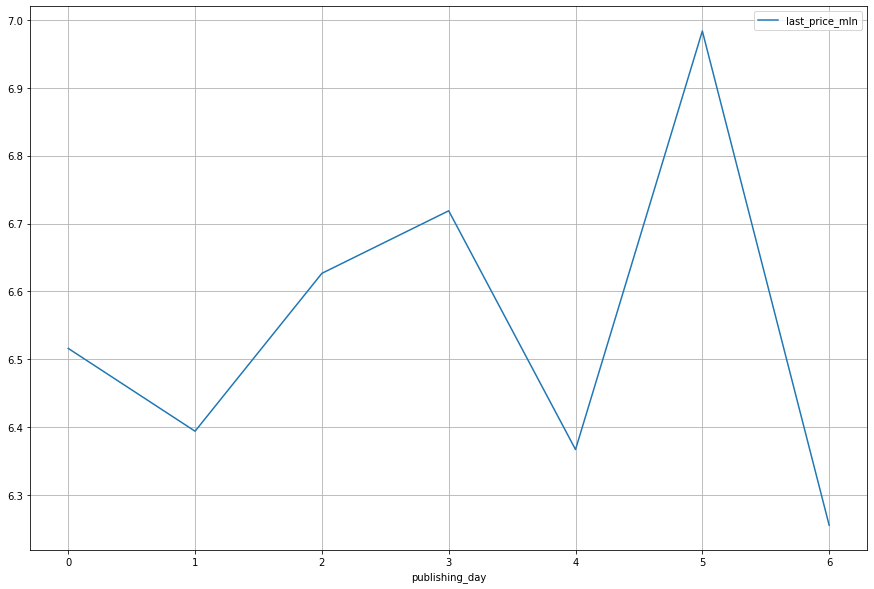

In [77]:
(
    data.pivot_table(index='publishing_day', values='last_price_mln', aggfunc='mean') 
    .plot(grid=True, figsize=(15, 10)) 
)

Корреляция: 0.0016481158004328712


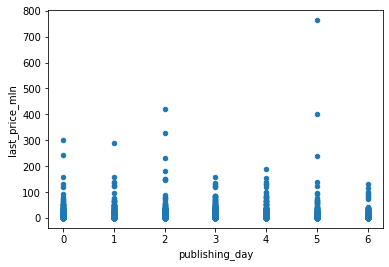

In [78]:
data.plot(x='publishing_day', y='last_price_mln', kind='scatter')
print('Корреляция:',data['publishing_day'].corr(data['last_price_mln']))

**Зависимость от месяца размещения**

<AxesSubplot:xlabel='publishing_month'>

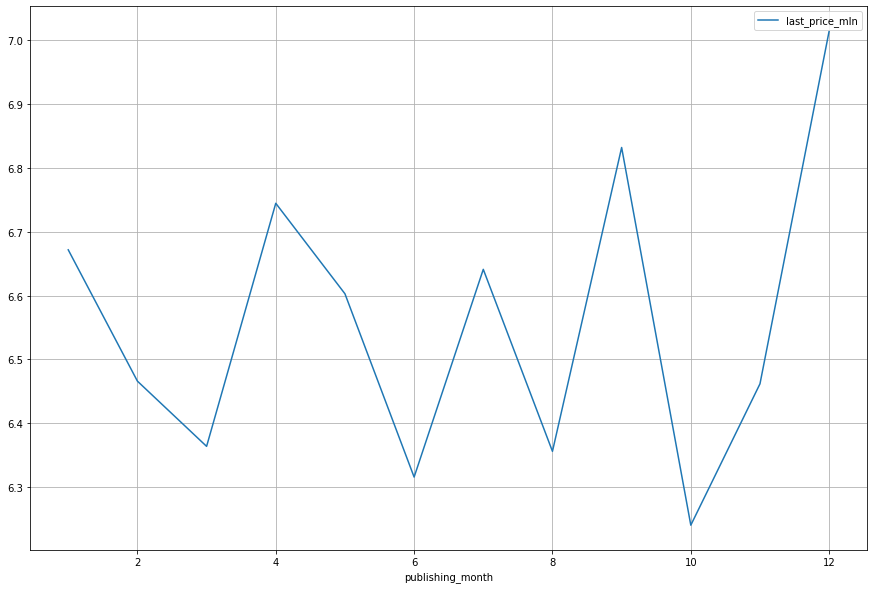

In [79]:
(
    data.pivot_table(index='publishing_month', values='last_price_mln', aggfunc='mean') 
    .plot(grid=True, figsize=(15, 10)) 
)

Корреляция: 0.0028055610209646695


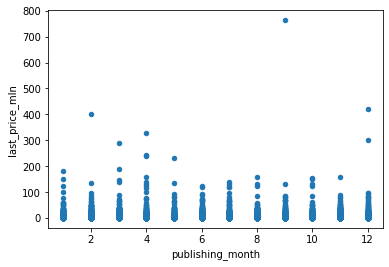

In [80]:
data.plot(x='publishing_month', y='last_price_mln', kind='scatter')
print('Корреляция:',data['publishing_month'].corr(data['last_price_mln']))

**Зависимость от года размещения**

<AxesSubplot:xlabel='publishing_year'>

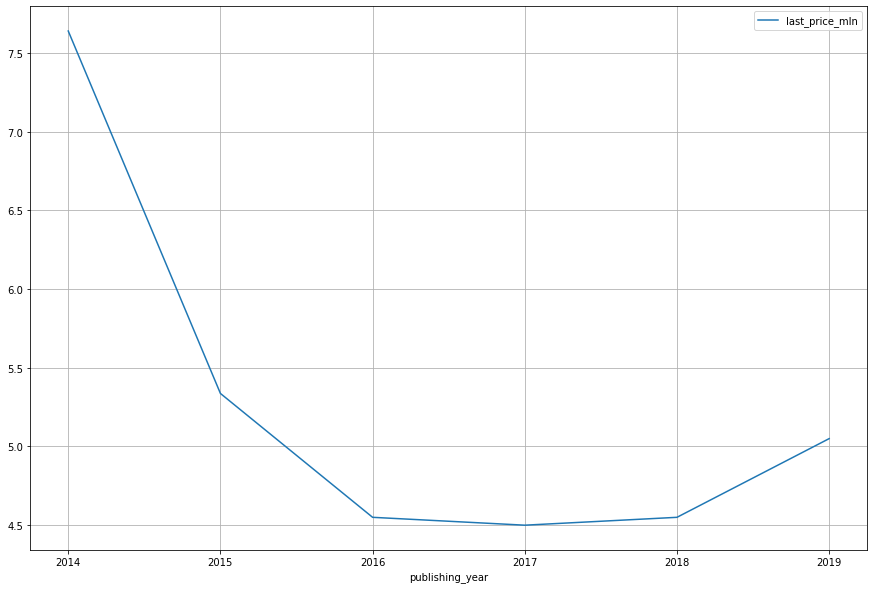

In [81]:
(
    data.pivot_table(index='publishing_year', values='last_price_mln', aggfunc='median') 
    .plot(grid=True, figsize=(15, 10)) 
)

Корреляция: -0.0429979184042341


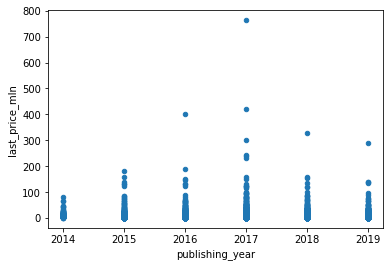

In [82]:
data.plot(x='publishing_year', y='last_price_mln', kind='scatter')
print('Корреляция:',data['publishing_year'].corr(data['last_price_mln']))

Зависимости от дня недели, месяца и года публикации нет.

**Вывод:** Больше всего на общую стоимость объектка влияет общая площадь, в меньше степени влияет жилая площадь, площадь кухни и количество комнат. Влияния других параметров не обнаружено.  

### Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [83]:
pivot_table_price = data.pivot_table(index='locality_name', values='price_square_meter', aggfunc='median') # сделаем сводную таблицу по названию населённого пункта, где считаем медианную стоимость квадратного метра  
pivot_table_price['count'] = data.groupby('locality_name')['total_area'].count() # считаем число объявлений в каждом населённом пункте

top10_towns_price = pivot_table_price.sort_values('count', ascending=False).head(10) # находим 10 населённых пунктов с наибольшим числом объявлений
top10_towns_price.sort_values('price_square_meter', ascending=False).head(10) # сортируем по убыванию стоимости 


,price_square_meter,count
locality_name,,
Санкт-Петербург,104770.266315,15709
Пушкин,100000.000000,369
деревня Кудрово,91860.465116,299
поселок Парголово,91642.857143,327
поселок Мурино,85878.462169,556
поселок Шушары,76876.172608,440
Колпино,74723.748474,338
Гатчина,67796.610169,307
Всеволожск,65789.473684,397


**Вывод:** Высокая стоимость квадратного метра в Санкт-Петербурге и Пушкине. Низкая в Гатчине и Всеволожске. Самая низкая в Выборге. 

### Опишим, как стоимость объектов зависит от расстояния до центра в Санкт-Петербурге.

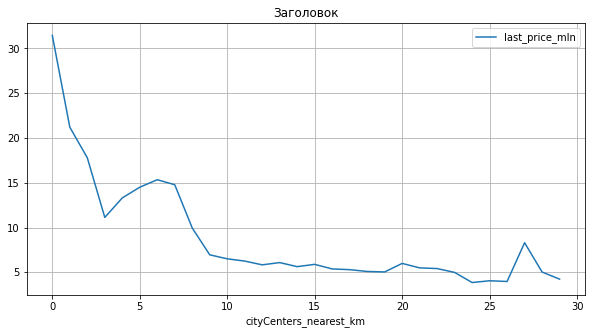

In [84]:
(
    data.query('locality_name == "Санкт-Петербург"') # выберем Санкт-Петербург
    .pivot_table(index='cityCenters_nearest_km', values='last_price_mln', aggfunc='mean') #добавим сводную таблицу со средней стоимостью объекта на каждом километре
    .plot(grid=True, figsize=(10, 5), title = 'Заголовок') # построим график по этим данным
)
plt.show()

**Вывод:** Наиболее высокая стоимость объекта ближе к центру города. Чем дальше от центра, тем цена ниже, но в местах 6-7 км и 26-27 км цена становится значительно выше.

## Общий вывод

В исследовании мы изучали:
1. **Как быстро продаются квартиры**

Квартиры продаются обычно за 100 дней.   

2. **Какие факторы больше всего влиают на общую стоимость объекта**

Больше всего на общую стоимость объекта влияет общая площадь, в меньше степени влияет жилая площадь, площадь кухни и количество комнат. 

3. **Населённые пункты с самой высокой и низкой стоимостью квадратного метра**

Самая высокая стоимость квадратного метра в Санкт-Петербурге. Самая низкая в Выборге.

4. **Как стоимость объекта зависит от расстояния до центра города**

Чем ближе к центру города, тем цена объекта выше. В некоторых далёких от центра местах цена сильно скачет в большую сторону. Скорее всего, в этих местах на цену влиют другие параметры.